In [10]:
### Importing the required libraries
# For formatting data
import pandas as pd
from sklearn.metrics import confusion_matrix
# For standarization
from sklearn.preprocessing import MinMaxScaler
# For visualization
import matplotlib.pyplot as plt
import seaborn as sn
# For Machine Learning Algorithm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [11]:
collections = [
    '2112E58C64F6', #only pred_7 and pred_3
    '40X0A0P4F97G',
    '78B0A030F97G',
    'Z304GSQ0',
    'Z305AQQP',
    'ZA11X9R8',
    'ZA12KZ0K',
    'ZA14EE4H',
    'ZA16DQA0',
    'ZA16DXEY',
    'ZJV4370N'
]

X = pd.DataFrame()
y= pd.DataFrame()

for col in collections:
    # Get a single dataframe from local file
    cDF = pd.read_csv('all_pred_7/' + col + '_raw.csv')
    
    # Dropping unnecessary columns
    cDF = cDF.drop(['_id', 'date', 'serial_number', 'model',
                  'capacity_bytes'], axis='columns')
    
    # Putting feature variable to X
    cX = cDF.drop('failure', axis='columns')
    
    # Putting response variable to y
    cy = cDF['failure']
    
    # Dropping empty columns
    cX = cX.dropna(axis='columns',how='all')
    
    # Dropping columns with the same values
    cX = cX[[column for column in cX if cX[column].nunique()>1]]
    
    # Join all dataframes
    X = pd.concat([X , cX])
    y = pd.concat([y , cy])
    
    
# Convert NaN values to zero values
X = X.fillna(0)

# Normalize the data
sc = MinMaxScaler(feature_range=(-1, 1))
normed_X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)


In [12]:
normed_X

,smart_18_raw,smart_222_raw,smart_17_raw,smart_12_raw,smart_13_raw,smart_163_raw,smart_1_raw,smart_250_raw,smart_251_raw,smart_255_raw,smart_2_raw,smart_9_raw,smart_10_raw,smart_11_raw
0,-0.999059,0.000000,-1.00,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.00,-1.000000,-1.0,-1.0,-1.000000
1,-0.999849,-0.333333,-1.00,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.00,-1.000000,-1.0,-1.0,-1.000000
2,-0.998946,0.000000,-1.00,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.00,-1.000000,-1.0,-1.0,-1.000000
3,-0.998607,0.333333,-1.00,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.00,-1.000000,-1.0,-1.0,-1.000000
4,-0.998456,0.666667,-1.00,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.00,-1.000000,-1.0,-1.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,-0.268848,-1.000000,0.95,0.893617,-0.621606,-1.0,0.333333,-1.0,-1.0,0.98,-0.177643,-1.0,-1.0,-1.000000
922,-0.262861,-1.000000,0.95,0.893617,-0.612920,-1.0,0.383333,-1.0,-1.0,0.98,0.461785,-1.0,-1.0,-1.000000
923,-0.261693,-1.000000,0.95,0.893617,-0.609977,-1.0,0.366667,-1.0,-1.0,0.98,0.388870,-1.0,-1.0,-1.000000
924,-0.254952,-1.000000,0.95,0.893617,-0.599005,-1.0,0.200000,-1.0,-1.0,0.96,0.500267,-1.0,-1.0,-0.994539


In [13]:
# Splitting the data into train and test
training, testing, training_labels, testing_labels = train_test_split(
    normed_X, y.values.ravel(), test_size=.3, random_state=42)


In [14]:
# Make Classifier
clf = RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)
print(clf.score(training, training_labels))
print(clf.score(testing, testing_labels))


1.0
0.9964028776978417


Text(69.0, 0.5, 'Truth')

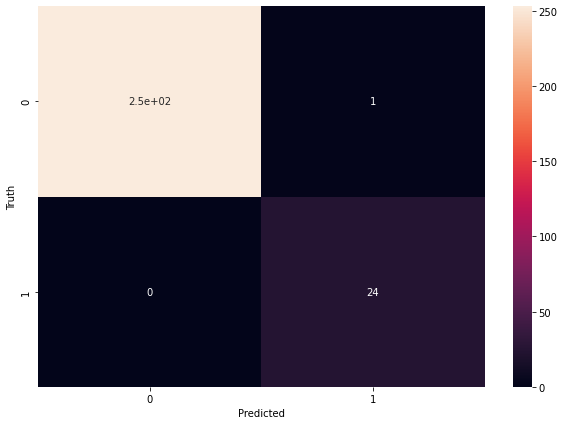

In [15]:
cm = confusion_matrix(testing_labels, preds)

%matplotlib inline
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [16]:
pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(
    by=0, ascending=False)


,0
smart_18_raw,0.300611
smart_13_raw,0.185076
smart_17_raw,0.131799
smart_11_raw,0.118193
smart_255_raw,0.049540
smart_1_raw,0.045884
smart_2_raw,0.044934
smart_222_raw,0.041675
smart_12_raw,0.032332
smart_10_raw,0.015736
